In [1]:
# Read the February 2012 power data from the data folder.
import pandas as pd
df = pd.read_csv("../data/2013-06-power-survey-london.csv")

In [2]:
df.head()

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,M_count,N_count,O_count,P_count,Q_count,U_count,count,sigma,mean,std
0,2013-06-01 00:00:00,28.841,2.666,17.601,38.010,192.506,70.301,22.418,55.198,3.866,...,93,123,82,86,679,37,4262,669.672000,0.157126,0.263917
1,2013-06-01 00:30:00,26.124,2.286,16.574,32.886,169.456,62.862,21.424,46.470,3.770,...,93,123,82,86,677,37,4262,594.306000,0.139443,0.232293
2,2013-06-01 01:00:00,24.143,2.238,15.170,29.249,155.277,58.933,17.762,42.945,3.543,...,93,123,82,86,677,37,4262,534.065001,0.125309,0.199032
3,2013-06-01 01:30:00,22.547,2.144,14.126,28.413,143.576,57.203,15.988,38.656,3.464,...,93,123,82,86,677,37,4263,490.777000,0.115125,0.165880
4,2013-06-01 02:00:00,21.833,1.972,13.175,27.348,135.699,52.296,14.142,37.785,3.348,...,93,123,82,86,677,37,4263,455.068000,0.106748,0.142431


In [4]:
from datetime import datetime
#type(df['datetime'][0])
#date_time_obj = datetime.strptime(df['datetime'][0], "%m/%d/%Y %H:%M")

# Create two functions that will allow us to create data based on the data in each row.

def dayCalc(row):
    return pd.to_datetime(row['datetime']).day

def tstampCalc(row):
    return f"{pd.to_datetime(row['datetime']).hour}:{pd.to_datetime(row['datetime']).minute:02}"
    
# Create new columns for the day of the month and also a column for the time stamp (e.g. 20:30).

df['day'] = df.apply(dayCalc, axis = 1)
df['tstamp'] = df.apply(tstampCalc, axis = 1)

# Could also do it with a lambda.
#df['day'] = pd.to_datetime(df['datetime'])
#df['day'] = df.apply(lambda row: pd.to_datetime(row['datetime']).day, axis = 1)

In [5]:
# Create a dataframe representing energy consumption for February 11th 2012, the day
# of the England vs. Italy game.

df_England_Italy_2_11 = df.loc[df['day']==11]
df_England_Italy_2_11 = df_England_Italy_2_11.set_index(df_England_Italy_2_11["tstamp"])
df_England_Italy_2_11.head(5)

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,N_count,O_count,P_count,Q_count,U_count,mean,count,sigma,day,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,2/11/2012 0:00,5.162,0.101,2.609,10.834,72.959,17.126,4.532,4.403,0.121,...,3,4,9,87,5,0.260954,588,153.441001,11,0:00
0:30,2/11/2012 0:30,5.763,0.141,1.589,9.842,109.956,17.269,8.905,4.726,0.091,...,3,4,9,87,5,0.400784,589,236.061999,11,0:30
1:00,2/11/2012 1:00,5.561,0.070,1.434,8.317,105.638,15.477,7.913,3.438,0.084,...,3,4,9,87,5,0.370654,589,218.315000,11,1:00
1:30,2/11/2012 1:30,4.040,0.099,1.398,7.345,100.991,12.926,7.624,3.306,0.103,...,3,4,9,87,5,0.336251,589,198.052000,11,1:30
2:00,2/11/2012 2:00,3.106,0.060,1.282,5.831,93.154,12.020,8.027,2.332,0.063,...,3,4,9,87,5,0.298937,589,176.074001,11,2:00


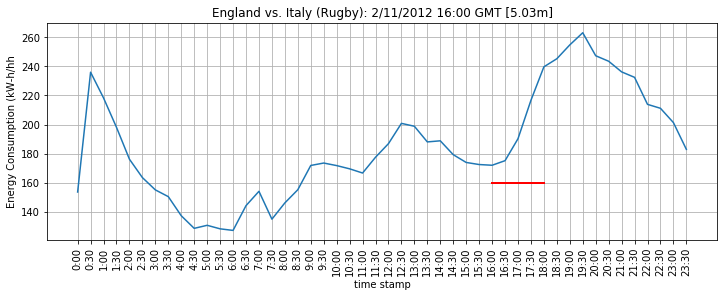

In [6]:
# Plot the day's energy consumption.

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,4))
plt.plot(df_England_Italy_2_11["tstamp"],df_England_Italy_2_11["sigma"])
plt.xticks(rotation='vertical')
plt.title("England vs. Italy (Rugby): 2/11/2012 16:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['16:00', '18:00'], [160, 160], color='r', linestyle='-', linewidth=2)
plt.show()

In [7]:
# Create date series for each Acorn group.

# Acorn1 = A, B, C
# Acorn2 = D, E
# Acorn3 = F, G, H, I, J
# Acorn4 = K, L, M, N
# Acorn5 = O, P, Q

Acorn1  = df_England_Italy_2_11["A_sigma"] + df_England_Italy_2_11["B_sigma"] + df_England_Italy_2_11["C_sigma"]
Acorn2  = df_England_Italy_2_11["D_sigma"] + df_England_Italy_2_11["E_sigma"]
Acorn3  = df_England_Italy_2_11["F_sigma"] + df_England_Italy_2_11["G_sigma"] + df_England_Italy_2_11["H_sigma"] \
                                           + df_England_Italy_2_11["I_sigma"] + df_England_Italy_2_11["J_sigma"]
Acorn4  = df_England_Italy_2_11["K_sigma"] + df_England_Italy_2_11["L_sigma"] + df_England_Italy_2_11["M_sigma"] \
                                           + df_England_Italy_2_11["N_sigma"]
Acorn5  = df_England_Italy_2_11["O_sigma"] + df_England_Italy_2_11["P_sigma"] + df_England_Italy_2_11["Q_sigma"]

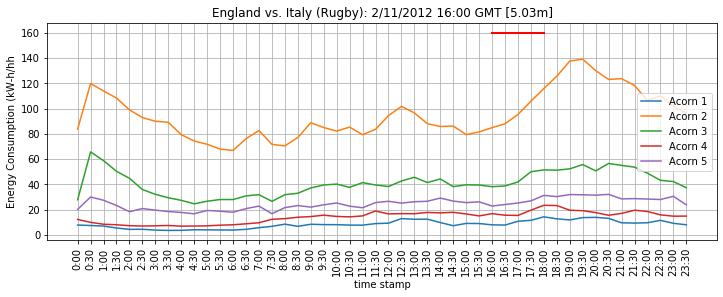

In [8]:
# Plot the day's energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(12,4))
hnd1, = plt.plot(df_England_Italy_2_11["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_England_Italy_2_11["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_England_Italy_2_11["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_England_Italy_2_11["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_England_Italy_2_11["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("England vs. Italy (Rugby): 2/11/2012 16:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['16:00', '18:00'], [160, 160], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

In [9]:
# Normalize the energy consumption for each Acorn group using the timestamp 19:30 as the reference value.
# This is to compare trends amongst the groups.

Acorn1 = Acorn1 / Acorn1['19:30']
Acorn2 = Acorn2 / Acorn2['19:30']
Acorn3 = Acorn3 / Acorn3['19:30']
Acorn4 = Acorn4 / Acorn4['19:30']
Acorn5 = Acorn5 / Acorn5['19:30']

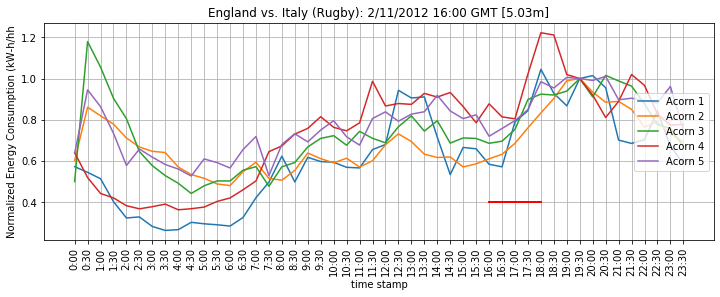

In [10]:
# Plot the day's normalized energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(12,4))
hnd1, = plt.plot(df_England_Italy_2_11["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_England_Italy_2_11["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_England_Italy_2_11["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_England_Italy_2_11["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_England_Italy_2_11["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("England vs. Italy (Rugby): 2/11/2012 16:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Normalized Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['16:00', '18:00'], [0.4, 0.4], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

In [11]:
# Create a dataframe representing energy consumption for February 4th 2012, the day
# of the England vs. Scotland game.

df_England_Scotland_2_4 = df.loc[df['day']==4]
df_England_Scotland_2_4 = df_England_Scotland_2_4.set_index(df_England_Scotland_2_4["tstamp"])
df_England_Scotland_2_4.head(5)

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,N_count,O_count,P_count,Q_count,U_count,mean,count,sigma,day,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,2/4/2012 0:00,5.243,0.118,2.938,8.339,63.827000,15.139,5.191,3.424,0.106,...,3,4,8,81,5,0.261459,529,138.312000,4,0:00
0:30,2/4/2012 0:30,5.508,0.116,1.772,7.816,95.781001,14.091,7.764,3.047,0.104,...,3,4,8,81,5,0.395076,529,208.995001,4,0:30
1:00,2/4/2012 1:00,5.679,0.136,1.072,5.671,87.435000,11.326,7.978,2.779,0.136,...,3,4,8,81,5,0.353115,529,186.797999,4,1:00
1:30,2/4/2012 1:30,4.820,0.171,1.049,4.506,82.327000,10.787,8.026,2.867,0.121,...,3,4,8,81,5,0.322021,529,170.348999,4,1:30
2:00,2/4/2012 2:00,4.063,0.106,1.005,4.343,82.252000,10.628,7.463,2.711,0.136,...,3,4,8,81,5,0.306486,529,162.131000,4,2:00


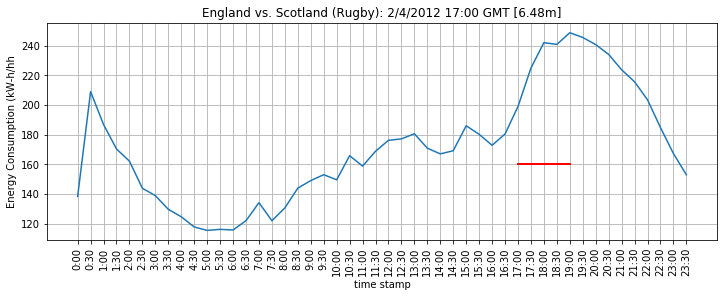

In [12]:
# Create a plotting function.

def eventPlotter(dfx, title, tsb, tse):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(12,4))
    plt.plot(dfx["tstamp"],dfx["sigma"])
    plt.xticks(rotation='vertical')
    plt.title(title)
    plt.xlabel("time stamp")
    plt.ylabel("Energy Consumption (kW-h/hh")
    plt.grid()
    plt.plot([tsb, tse], [160, 160], color='r', linestyle='-', linewidth=2)
    plt.show()

# Enter details for the England vs. Scotland game, which took place on day 4
# between 17:00 and 19:00 (approx).

dfevent = df_England_Scotland_2_4
title   = "England vs. Scotland (Rugby): 2/4/2012 17:00 GMT [6.48m]"
tsb     = '17:00'
tse     = '19:00'

# Plot the day's energy consumption.

eventPlotter(dfevent, title, tsb, tse)

In [13]:
# Create a dataframe representing energy consumption for February 25th 2012, the day
# of the England vs. Wales game.

df_England_Wales_2_25 = df.loc[df['day']==25]
df_England_Wales_2_25 = df_England_Wales_2_25.set_index(df_England_Wales_2_25["tstamp"])
df_England_Wales_2_25.head(5)

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,N_count,O_count,P_count,Q_count,U_count,mean,count,sigma,day,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,2/25/2012 0:00,4.625,0.133,1.879,10.925,64.512,14.912,3.532,4.671,0.096,...,3,4,23,96,6,0.203802,677,137.974000,25,0:00
0:30,2/25/2012 0:30,3.973,0.061,2.030,13.119,107.047,14.042,7.232,3.545,0.091,...,3,4,23,95,6,0.369797,676,249.983001,25,0:30
1:00,2/25/2012 1:00,3.865,0.147,1.327,12.236,94.214,14.024,6.835,2.826,0.101,...,3,4,23,95,6,0.321324,676,217.214999,25,1:00
1:30,2/25/2012 1:30,3.397,0.135,1.300,11.548,89.557,12.267,6.368,3.253,0.092,...,3,4,23,95,6,0.293089,676,198.128000,25,1:30
2:00,2/25/2012 2:00,2.877,0.103,1.057,9.700,77.838,12.166,6.574,2.595,0.110,...,3,4,23,95,6,0.252484,676,170.679000,25,2:00


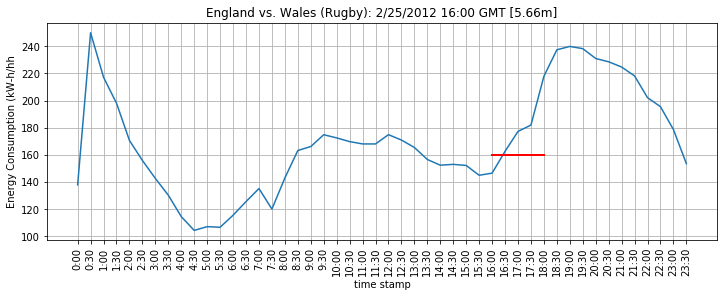

In [14]:
# Enter details for the England vs. Wales game, which took place on day 25
# between 16:00 and 18:00 (approx).

dfevent = df_England_Wales_2_25
title   = "England vs. Wales (Rugby): 2/25/2012 16:00 GMT [5.66m]"
tsb     = '16:00'
tse     = '18:00'

# Plot the day's energy consumption.

eventPlotter(dfevent, title, tsb, tse)